Early Detection of Tuberculosis in Resource-Constrained Settings: A Deep Learning Approach for Chest X-ray Analysis and Wearable Sensor Data Fusion for TB Diagnosis

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import zipfile
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving lungs.zip to lungs.zip


In [ ]:
with zipfile.ZipFile('lungs.zip', 'r') as zip_ref:
    zip_ref.extractall('lungs-dataset')

In [ ]:
base_dir = '/content/lungs-dataset/Dataset of Tuberculosis Chest X-rays Images'
normal_dir = os.path.join(base_dir, 'Normal')
tuberculosis_dir = os.path.join(base_dir, 'Tuberculosis')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
os.makedirs(os.path.join(train_dir, 'Normal'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'Tuberculosis'), exist_ok=True)
os.makedirs(os.path.join(validation_dir, 'Normal'), exist_ok=True)
os.makedirs(os.path.join(validation_dir, 'Tuberculosis'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'Normal'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'Tuberculosis'), exist_ok=True)

In [ ]:
for class_name in ['Normal', 'Tuberculosis']:
    class_dir = os.path.join(base_dir, class_name)
    images = os.listdir(class_dir)
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

    # Move images to their respective directories
    for img in train_images:
        os.rename(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))
    for img in val_images:
        os.rename(os.path.join(class_dir, img), os.path.join(validation_dir, class_name, img))
    for img in test_images:
        os.rename(os.path.join(class_dir, img), os.path.join(test_dir, class_name, img))

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2406 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 300 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 302 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models, Input

# Define the model with an explicit Input layer
model = models.Sequential([
    Input(shape=(150, 150, 3)),  # Explicit Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9421 - loss: 0.1483 - val_accuracy: 0.9826 - val_loss: 0.0497
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 1.0000 - loss: 0.0267 - val_accuracy: 0.9931 - val_loss: 0.0333
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9701 - loss: 0.0751 - val_accuracy: 0.9861 - val_loss: 0.0514
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.9688 - loss: 0.0737 - val_accuracy: 0.9826 - val_loss: 0.0587
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9654 - loss: 0.0952 - val_accuracy: 0.9896 - val_loss: 0.0249
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.9375 - loss: 0.1913 - val_accuracy: 1.0000 - val_loss: 0.0177
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9633 - loss: 0.0924 - val_accuracy: 0.9618 - val_loss: 0.0788
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.9375 - loss: 0.1238 - val_accuracy: 0.95

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc:.4f}')


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 492ms/step - accuracy: 0.9653 - loss: 0.0935
Test accuracy: 0.9618


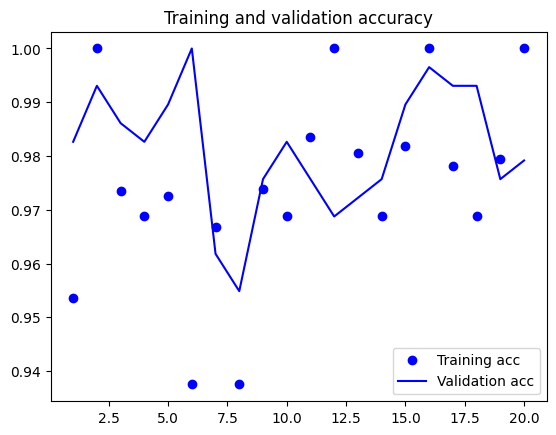

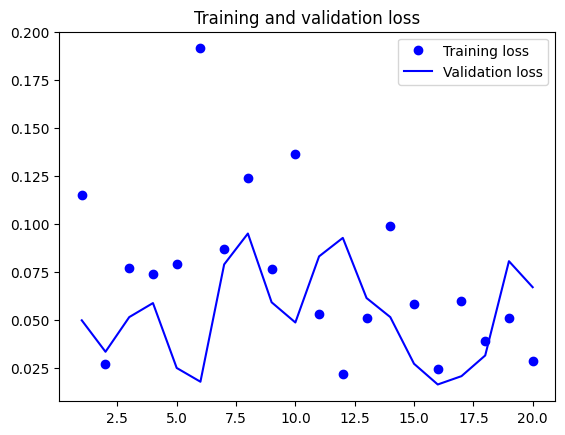

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the model to Google Drive
model.save('/content/drive/My Drive/tb_detection_model.h5')

Mounted at /content/drive
